In [353]:
#imports
import random
import networkx as nx
import numpy as np
import time

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler 

In [362]:
#methods for defining datasets
def big_square_tuples_list(n):
    
    tuples = []
    for i in range (n):
        a = random.randrange(0, 1000)
        b = random.randrange(0, 1000)
        tuples.append((a,b))
        
    return tuples
    
def random_tuple_groups_list(nodes, groups):
    
    tuples = []
    for j in range(0,groups):
        for i in range(int(nodes/groups)):
            a = random.randrange(j*groups*100 -350,j*groups*100)
            b = random.randrange(j*groups*100 -350,j*groups*100)
            tuples.append((a,b))
            
    return tuples
            
def circle_in_circle_tuples_list(nodes):
    tuples = []
    
    X, Y = datasets.make_circles(
    n_samples=nodes, factor=0.5, noise=0.05, random_state=30
    )
    
    
    for x in X:
        x[0] = x[0]*657
        x[1] = x[1]*657
        tuples.append((x[0],x[1]))
    return tuples

def double_horseshoes_tuples_list(nodes):
    tuples = []
    
    X,Y = datasets.make_moons(
    n_samples=nodes, noise=0.05, random_state=30
    )
    
    for x in X:
        x[0] = x[0]*750
        x[1] = x[1]*750
        tuples.append((x[0],x[1]))
        
    return tuples
        
    
def lines_tuples_list(nodes):
    points = []
    
    for i in range(0,nodes,10):
        points.append((i,i))
        points.append((i+100,i-100))
        points.append((i+200, i-200))
        points.append((i+300, i-300))
        points.append((i+400, i-400))
        
    return points

In [364]:
#methods used in DBScan Method
def findNeighbors(graph, new_Node):
    neighbors = []
    for node in graph.nodes():
        distance = np.sqrt(np.square(new_Node[0] - node[0]) + np.square(new_Node[1] - node[1]))
        if distance < 50 and distance != 0:
            neighbors.append(node)
    return neighbors

def buildNeighborhood(graph, node, neighborhood_Counter, neighborhood, visited):
    neighborhood[node] = neighborhood_Counter
    neighbors = findNeighbors(graph, node)
    if len(neighbors) > 3:
        for neighbor in neighbors:
            if (node,neighbor) not in graph.edges():
                graph.add_edge(node, neighbor)
                buildNeighborhood(graph, neighbor, neighborhood_Counter, neighborhood, visited)
    visited[node] = 1
    
class myQueue():
    
    def __init__(self):
        self.items = []
        
    def get(self):
        return self.items.pop(0)
    
    def add(self, item):
        self.items.append(item)

In [363]:
#DBScan Method
def DBScan(graph,bag):
    #add all nodes to a bag
    for node in graph.nodes():
        bag.add(node)
    #mark all nodes unvisited
    visited = {node:0 for node in graph.nodes() }
    neighborhood = {node:0 for node in graph.nodes() }
    neighborhood_counter = 0
    
    while len(bag.items) > 0:
        #remove node from bag
        new_Node= bag.get()
        if visited[new_Node] == 0:
            #mark node as visited
            visited[new_Node] = 1
            
            #search list of nodes for nodes within given radius
            neighbors = findNeighbors(graph, new_Node)
                #if neighbor count is high enough:
            if len(neighbors) > 3:
                # define a new neighborhood:
                neighborhood_counter += 1
                neighborhood[new_Node] = neighborhood_counter
                
                #make new edges connecting node to neighbors
                for node in neighbors:
                    graph.add_edge(new_Node,node)
                    buildNeighborhood(graph, node, neighborhood_counter, neighborhood, visited) 
                    
    for edge in graph.edges():
        if neighborhood[edge[0]] != neighborhood[edge[1]]:
            graph.remove_edge(edge[0],edge[1])
                    
    return neighborhood       

Runtime:
2.08845591545105


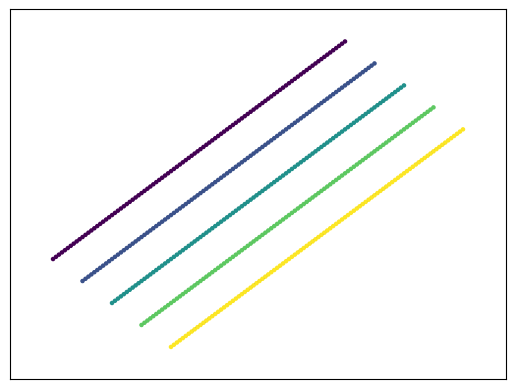

In [361]:
#test on lines dataset
points = lines_tuples_list(1000)

start = time.time()
gr = nx.Graph()
gr.add_nodes_from(points)
neighborhood_color = DBScan(gr,myQueue())
nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [neighborhood_color[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)
end = time.time()
runtime = (end - start)
print("Runtime:")
print(runtime)

Runtime:
21.05819582939148


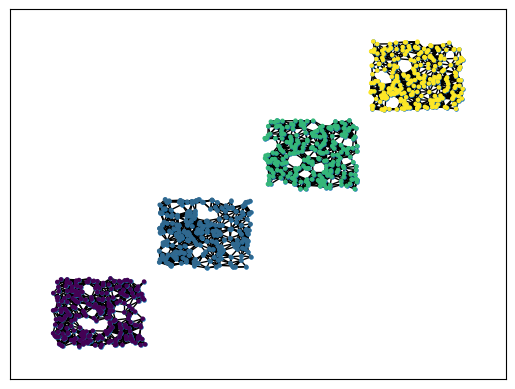

In [367]:
#test on boxes dataset
tupleList = random_tuple_groups_list(1000, 4)

start = time.time()
gr = nx.Graph()
gr.add_nodes_from(tupleList)
nx.draw_networkx(gr, {node:node for node in gr.nodes()}, with_labels = False, node_size = 5)

neighborhood_color = DBScan(gr,myQueue())

nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [neighborhood_color[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)

end = time.time()
runtime = (end - start)
print("Runtime:")
print(runtime)

Runtime:
12.675105810165405


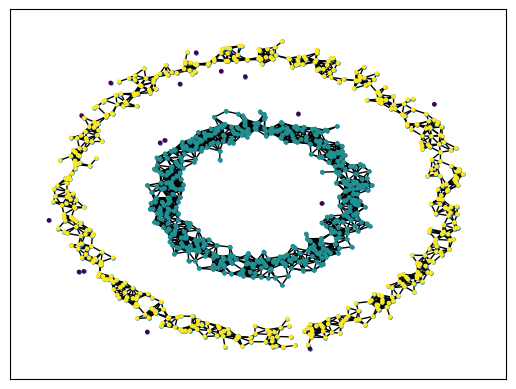

In [366]:
#testing on double circles dataset
tupleList  = circle_in_circle_tuples_list(998)


start = time.time()
gr = nx.Graph()
gr.add_nodes_from(tupleList)
nx.draw_networkx(gr, {node:node for node in gr.nodes()}, with_labels = False, node_size = 5)

neighborhood_color = DBScan(gr,myQueue())

nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [neighborhood_color[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)

end = time.time()
runtime = (end - start)
print("Runtime:")
print(runtime)

Runtime:
13.567397117614746


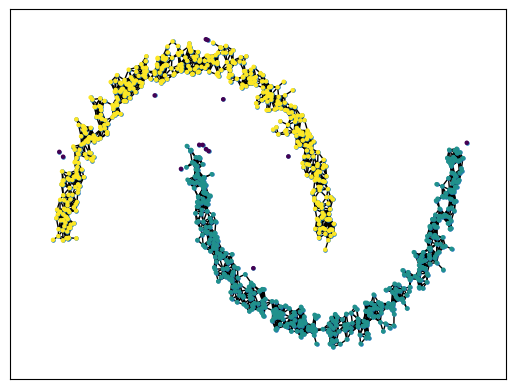

In [360]:
#test on double horseshoes dataset
tupleList  = double_horseshoes_tuples_list(1000)


start = time.time()
gr = nx.Graph()
gr.add_nodes_from(tupleList)
nx.draw_networkx(gr, {node:node for node in gr.nodes()}, with_labels = False, node_size = 5)

neighborhood_color = DBScan(gr,myQueue())

nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [neighborhood_color[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)

end = time.time()
runtime = (end - start)
print("Runtime:")
print(runtime)

Runtime:
10.364359140396118


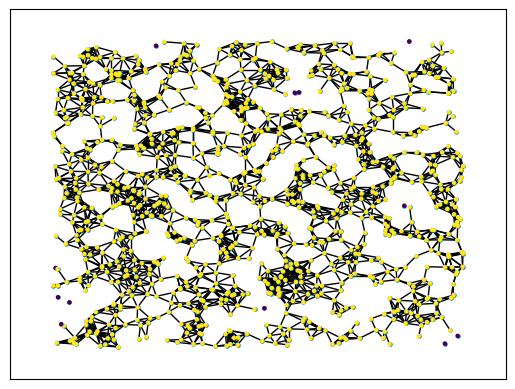

In [365]:
#test on big square tuple list
tupleList  = big_square_tuples_list(1000)

start = time.time()
gr = nx.Graph()
gr.add_nodes_from(tupleList)
nx.draw_networkx(gr, {node:node for node in gr.nodes()}, with_labels = False, node_size = 5)

neighborhood_color = DBScan(gr,myQueue())

nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [neighborhood_color[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)
end = time.time()
runtime = (end - start)
print("Runtime:")
print(runtime)
